In [1]:
import matplotlib.pyplot as plt
import os
from PIL import Image  # Import PIL to resize images
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil


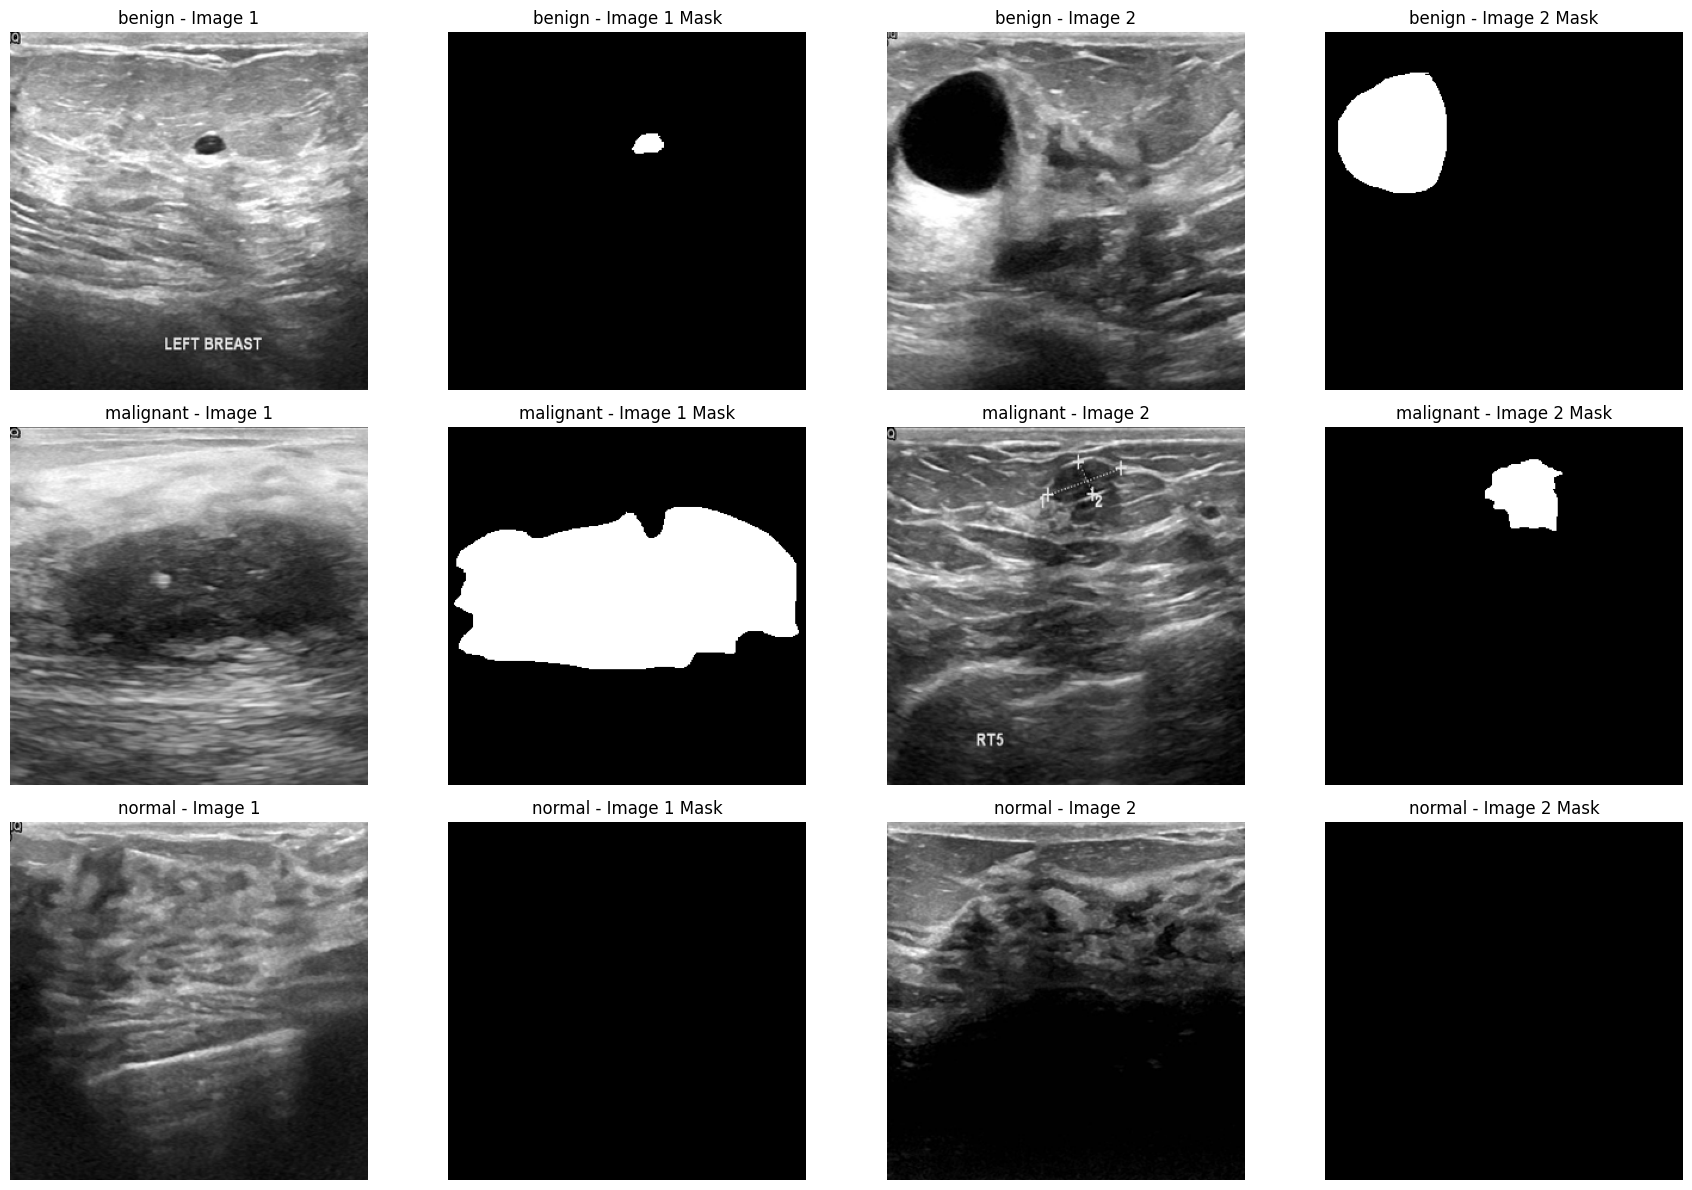

In [3]:
# Define the labels and corresponding directories
labels = ['benign', 'malignant', 'normal']
data_dir = "D:\\Dataset_BUSI_with_GT"

# Create a figure to display the images
fig, axs = plt.subplots(3, 4, figsize=(18, 12))

# Desired width and height for each image
desired_width = 300  # Adjust as needed
desired_height = 300  # Adjust as needed

for i, label in enumerate(labels):
    label_dir = os.path.join(data_dir, label)
    
    # Get a list of image files
    image_files = [file for file in os.listdir(label_dir) if file.endswith('.png')]
    
    # Sort the list of image files
    image_files = sorted(image_files)
    
    # Loop through the first 4 image files
    for j in range(4):
        if j < len(image_files):
            # Load and resize the image
            image_path = os.path.join(label_dir, image_files[j])
            image = Image.open(image_path)
            
            image = image.resize((desired_width, desired_height), Image.Resampling.LANCZOS)

            
            # Determine the label based on whether it's an image or a mask
            if j % 2 == 0:
                image_label = f'{label} - Image {j // 2 + 1}'
            else:
                image_label = f'{label} - Image {j // 2 + 1} Mask'
            
            # Display the image with the corresponding label
            axs[i, j].imshow(image)
            axs[i, j].set_title(image_label)
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()

In [4]:
# Set the path to the input folder containing images and masks
input_dir = "D:\\Dataset_BUSI_with_GT"

# Set the path to the output folder where overlayed images will be saved
output_dir = 'D:\\Dataset_BUSI_with_GT\kaggle\working\OverlayedImages'

# Create subdirectories for each label
labels = ['benign', 'malignant', 'normal']
for label in labels:
    os.makedirs(os.path.join(output_dir, label), exist_ok=True)

# Function to overlay images and masks, resize if needed, and save the result
def overlay_and_save(image_path, mask_path, output_path):
    try:
        # Check if both image and mask files exist
        if os.path.exists(image_path) and os.path.exists(mask_path):
            # Open the actual image and mask image
            image = Image.open(image_path)
            mask = Image.open(mask_path)

            # Ensure both images have the same color mode
            if image.mode != mask.mode:
                mask = mask.convert(image.mode)

            # Resize the images if their sizes don't match
            if image.size != mask.size:
                image = image.resize(mask.size)

            # Overlay the image with the mask
            overlayed = Image.blend(image, mask, alpha=0.5)

            # Save the overlayed image to the appropriate label folder
            label = os.path.basename(os.path.dirname(image_path))
            output_path = os.path.join(output_dir, label, os.path.basename(image_path))
            overlayed.save(output_path)
        else:
            #print(f"File not found for: {image_path} or {mask_path}. Skipping...")
            pass
    except Exception as e:
        print(f"An error occurred for: {image_path} or {mask_path}. Error: {str(e)}")

# Iterate through the subdirectories (benign, malignant, normal)
for label in labels:
    label_dir = os.path.join(input_dir, label)
    if os.path.isdir(label_dir):
        for image_filename in os.listdir(label_dir):
            if image_filename.endswith('.png'):
                image_path = os.path.join(label_dir, image_filename)
                # Construct the mask file path based on the naming convention
                mask_filename = image_filename.replace('.png', '_mask.png')
                mask_path = os.path.join(label_dir, mask_filename)
                overlay_and_save(image_path, mask_path, output_dir)

print("Overlayed images have been saved to /kaggle/working/OverlayedImages directory.")

<>:5: SyntaxWarning: invalid escape sequence '\k'
<>:5: SyntaxWarning: invalid escape sequence '\k'
C:\Users\black\AppData\Local\Temp\ipykernel_22464\2683871513.py:5: SyntaxWarning: invalid escape sequence '\k'
  output_dir = 'D:\\Dataset_BUSI_with_GT\kaggle\working\OverlayedImages'


Overlayed images have been saved to /kaggle/working/OverlayedImages directory.


In [5]:
import os

# Function to count the number of files in a directory
def count_files_in_directory(directory):
    return sum(len(files) for _, _, files in os.walk(directory))

# Set the paths to the input and output directories
input_dir = "D:\\Dataset_BUSI_with_GT"
output_dir = 'D:\\Dataset_BUSI_with_GT\kaggle\working\OverlayedImages'

# Count the files in the input and output directories
input_counts = {}
output_counts = {}

# Count files in input directory
for label in os.listdir(input_dir):
    label_dir = os.path.join(input_dir, label)
    if os.path.isdir(label_dir):
        input_counts[label] = count_files_in_directory(label_dir)

# Count files in output directory
for label in os.listdir(output_dir):
    label_dir = os.path.join(output_dir, label)
    if os.path.isdir(label_dir):
        output_counts[label] = count_files_in_directory(label_dir)

# Print file counts
print("File Counts Before Overlay-includes masks:")
for label, count in input_counts.items():
    print(f"{label}: {count} files")

print("\nFile Counts After Overlay:")
for label, count in output_counts.items():
    print(f"{label}: {count} files")

File Counts Before Overlay-includes masks:
benign: 891 files
kaggle: 780 files
malignant: 421 files
normal: 266 files

File Counts After Overlay:
benign: 437 files
malignant: 210 files
normal: 133 files


<>:9: SyntaxWarning: invalid escape sequence '\k'
<>:9: SyntaxWarning: invalid escape sequence '\k'
C:\Users\black\AppData\Local\Temp\ipykernel_22464\3830414693.py:9: SyntaxWarning: invalid escape sequence '\k'
  output_dir = 'D:\\Dataset_BUSI_with_GT\kaggle\working\OverlayedImages'


<>:2: SyntaxWarning: invalid escape sequence '\k'
<>:2: SyntaxWarning: invalid escape sequence '\k'
C:\Users\black\AppData\Local\Temp\ipykernel_22464\3450382774.py:2: SyntaxWarning: invalid escape sequence '\k'
  overlayed_dir = 'D:\\Dataset_BUSI_with_GT\kaggle\working\OverlayedImages'


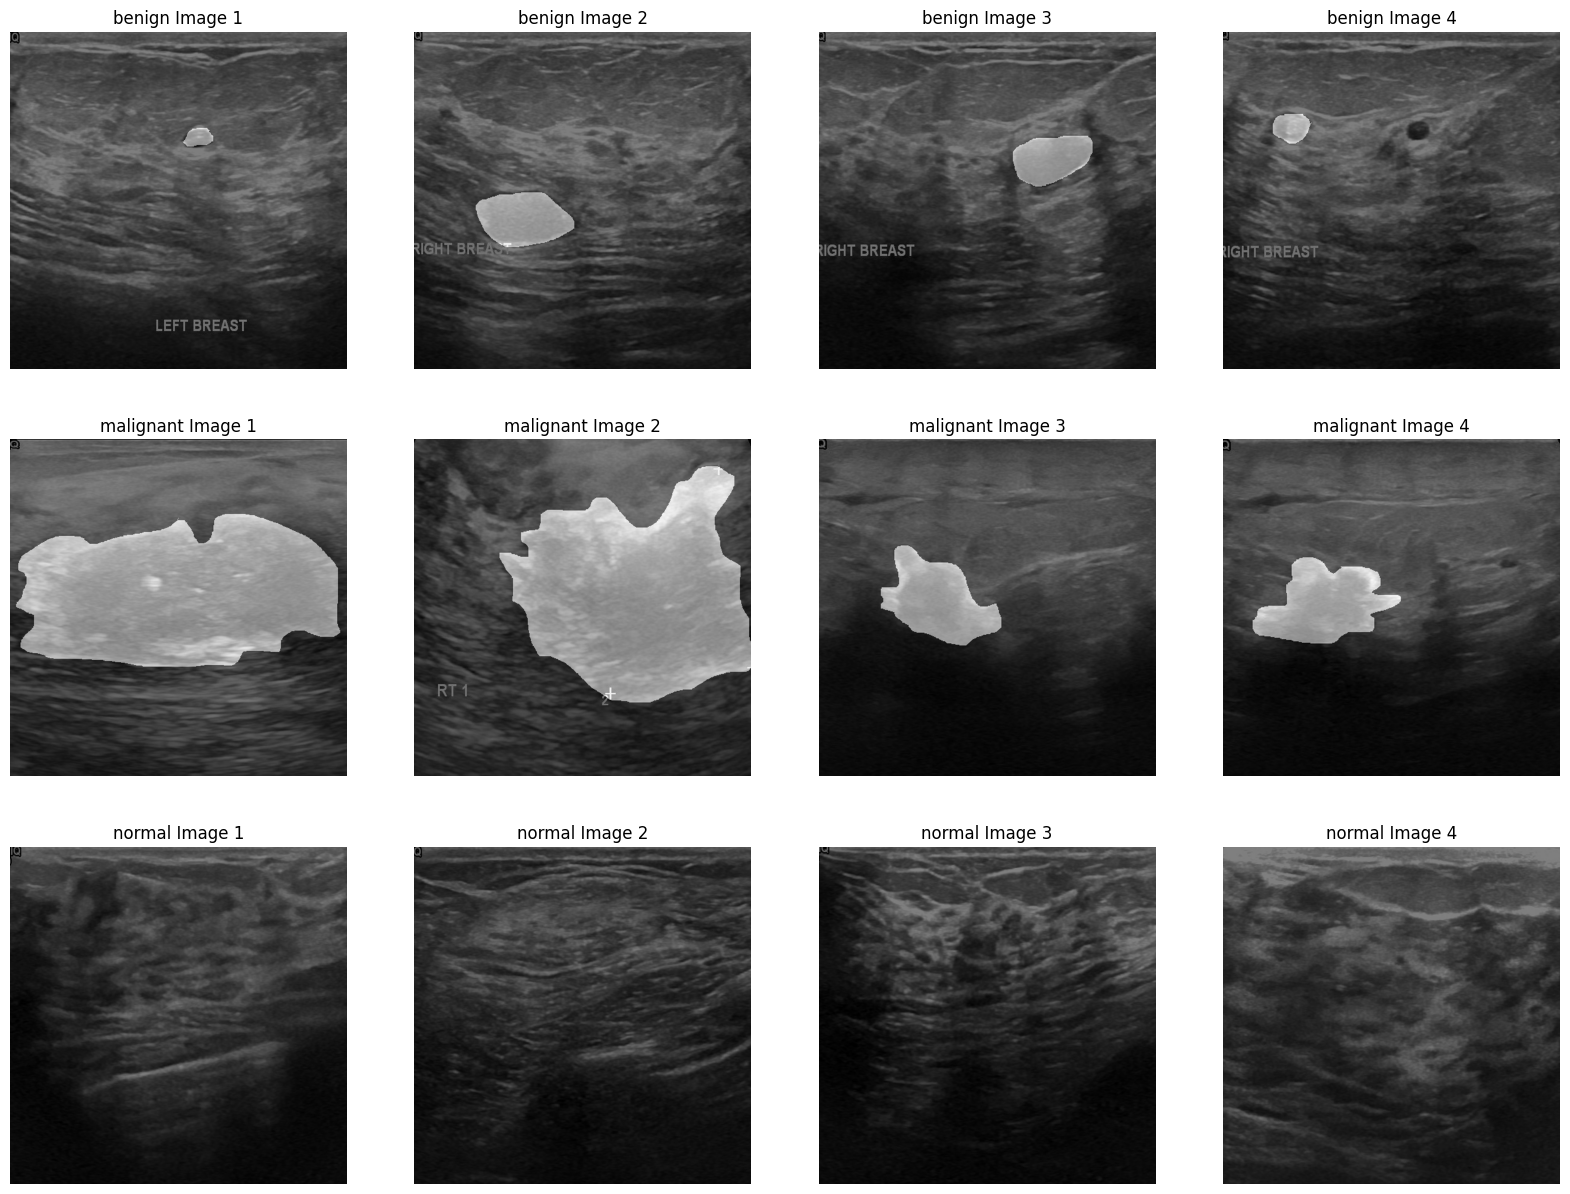

In [7]:
# Set the path to the overlayed images directory
overlayed_dir = 'D:\\Dataset_BUSI_with_GT\kaggle\working\OverlayedImages'

# Create subdirectories for each label
labels = ['benign', 'malignant', 'normal']
label_dirs = [os.path.join(overlayed_dir, label) for label in labels]

# Create a figure to display the images
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

# Desired width and height for each image
desired_width = 800  # Adjust as needed
desired_height = 800  # Adjust as needed

# Loop through each label and display the first 4 images
for i, label_dir in enumerate(label_dirs):
    # Get a list of image files and sort them
    images = [image for image in os.listdir(label_dir) if image.endswith('.png')]
    images.sort(key=lambda x: int(x.split('(')[1].split(')')[0]))  # Sort the images by number in parentheses

    for j, image_filename in enumerate(images[:4]):  # Display the first 4 images
        image_path = os.path.join(label_dir, image_filename)
        image = Image.open(image_path)

        # Resize the image to the desired width and height
        #image = image.resize((desired_width, desired_height), Image.ANTIALIAS)
        image = image.resize((desired_width, desired_height), Image.Resampling.LANCZOS)

        # Display the image in the subplot
        axs[i, j].imshow(image)
        axs[i, j].set_title(f'{labels[i]} Image {j + 1}')
        axs[i, j].axis('off')

plt.show()

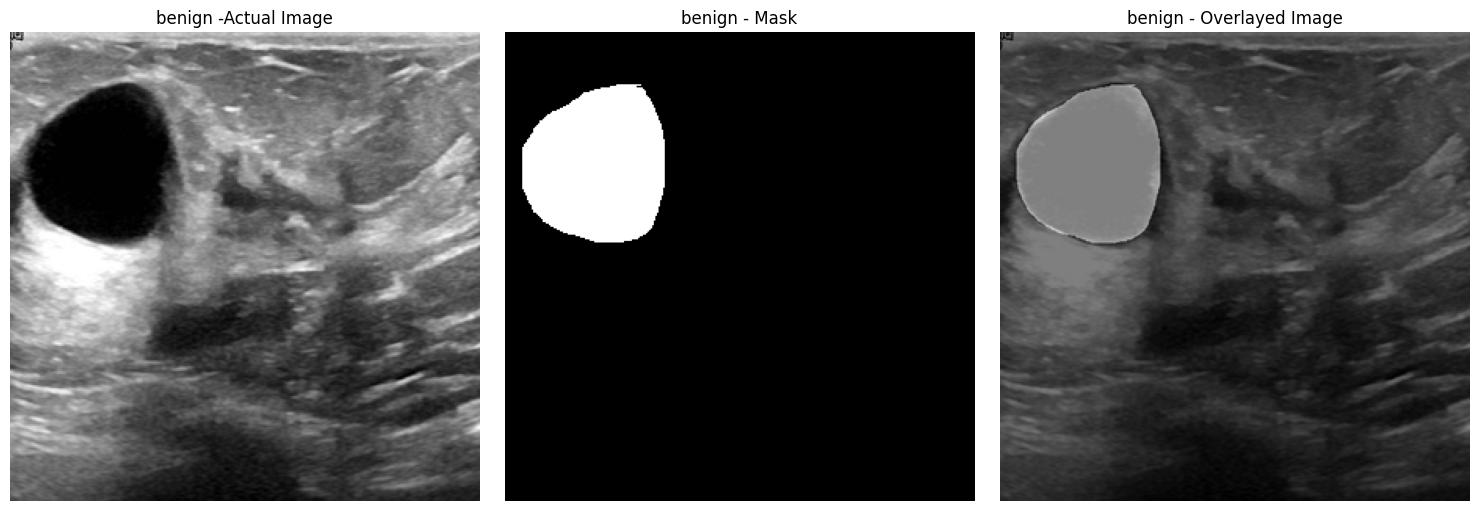

In [10]:
# Define the directory paths
input_dir = "D:\\Dataset_BUSI_with_GT"
#overlayed_dir = 'D:\\Dataset_BUSI_with_GT\kaggle\working\OverlayedImages\benign'
overlayed_dir = r'D:\Dataset_BUSI_with_GT\kaggle\working\OverlayedImages\benign'


# Create a figure to display the images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Desired width and height for display
desired_width = 300
desired_height = 300

# Select an image (change the index as needed)
image_filename = 'benign (10).png'

# Construct the file paths
actual_image_path = os.path.join(input_dir, 'benign', image_filename)
mask_image_path = os.path.join(input_dir, 'benign', image_filename.replace(".png", "_mask.png"))
overlayed_image_path = os.path.join(overlayed_dir, image_filename)

# Load the images
actual_image = Image.open(actual_image_path)
mask_image = Image.open(mask_image_path)
overlayed_image = Image.open(overlayed_image_path)

# Resize the images
actual_image = actual_image.resize((desired_width, desired_height), Image.Resampling.LANCZOS)
mask_image = mask_image.resize((desired_width, desired_height), Image.Resampling.LANCZOS)
overlayed_image = overlayed_image.resize((desired_width, desired_height), Image.Resampling.LANCZOS)

# Display the images
axs[0].imshow(actual_image)
axs[0].set_title('benign -Actual Image')
axs[0].axis('off')

axs[1].imshow(mask_image, cmap='gray')
axs[1].set_title('benign - Mask')
axs[1].axis('off')

axs[2].imshow(overlayed_image)
axs[2].set_title('benign - Overlayed Image')
axs[2].axis('off')

plt.tight_layout()
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\k'
<>:3: SyntaxWarning: invalid escape sequence '\k'
C:\Users\black\AppData\Local\Temp\ipykernel_22464\2268805838.py:3: SyntaxWarning: invalid escape sequence '\k'
  overlayed_dir = 'D:\\Dataset_BUSI_with_GT\kaggle\working\OverlayedImages\malignant'


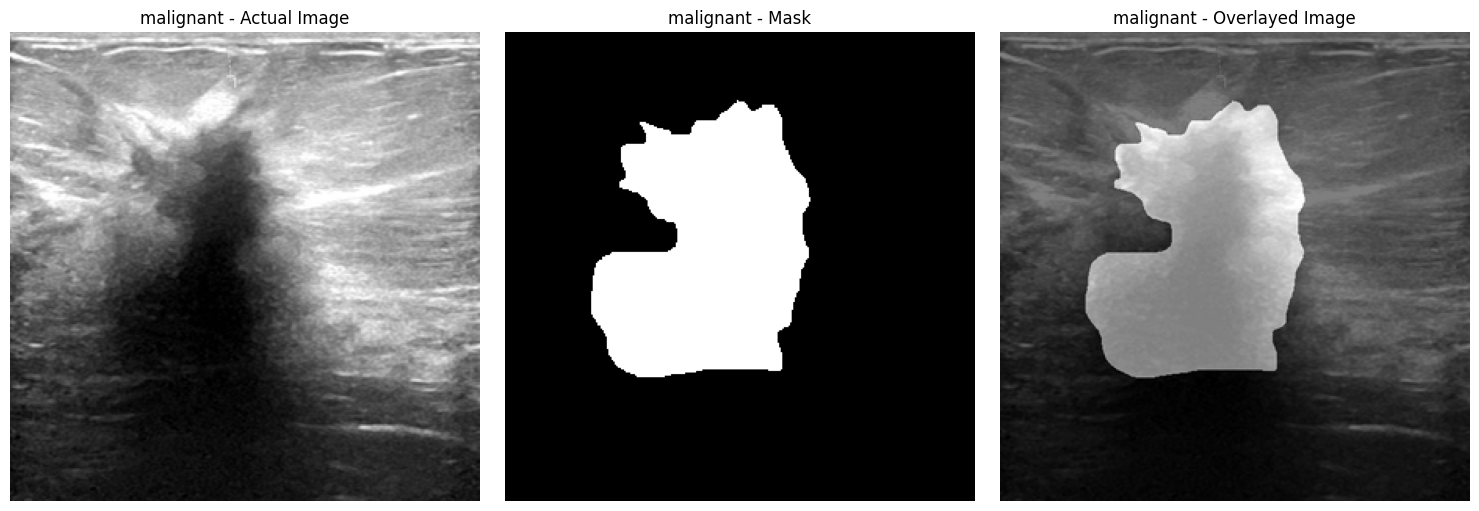

In [12]:
# Define the directory paths
input_dir = "D:\\Dataset_BUSI_with_GT"
overlayed_dir = 'D:\\Dataset_BUSI_with_GT\kaggle\working\OverlayedImages\malignant'

# Create a figure to display the images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Desired width and height for display
desired_width = 300
desired_height = 300

# Select an image (change the index as needed)
image_filename = 'malignant (103).png'

# Construct the file paths
actual_image_path = os.path.join(input_dir, 'malignant', image_filename)
mask_image_path = os.path.join(input_dir, 'malignant', image_filename.replace(".png", "_mask.png"))
overlayed_image_path = os.path.join(overlayed_dir, image_filename)

# Load the images
actual_image = Image.open(actual_image_path)
mask_image = Image.open(mask_image_path)
overlayed_image = Image.open(overlayed_image_path)

# Resize the images
actual_image = actual_image.resize((desired_width, desired_height), Image.Resampling.LANCZOS)
mask_image = mask_image.resize((desired_width, desired_height), Image.Resampling.LANCZOS)
overlayed_image = overlayed_image.resize((desired_width, desired_height), Image.Resampling.LANCZOS)

# Display the images
axs[0].imshow(actual_image)
axs[0].set_title('malignant - Actual Image')
axs[0].axis('off')

axs[1].imshow(mask_image, cmap='gray')
axs[1].set_title('malignant - Mask')
axs[1].axis('off')

axs[2].imshow(overlayed_image)
axs[2].set_title('malignant - Overlayed Image')
axs[2].axis('off')

plt.tight_layout()
plt.show()


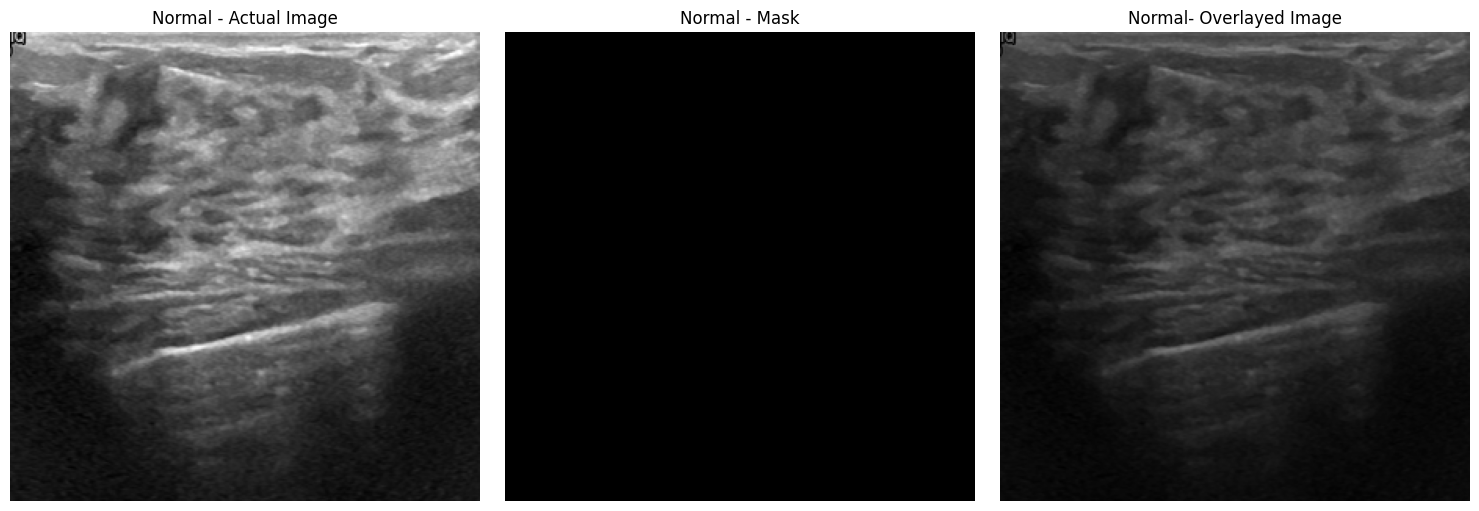

In [14]:
# Define the directory paths
input_dir ="D:\\Dataset_BUSI_with_GT"
overlayed_dir = r'D:\Dataset_BUSI_with_GT\kaggle\working\OverlayedImages\normal'


# Create a figure to display the images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Desired width and height for displayf
desired_width = 300
desired_height = 300

# Select an image (change the index as needed)
image_filename = 'normal (1).png'

# Construct the file paths
actual_image_path = os.path.join(input_dir, 'normal', image_filename)
mask_image_path = os.path.join(input_dir, 'normal', image_filename.replace(".png", "_mask.png"))
overlayed_image_path = os.path.join(overlayed_dir, image_filename)

# Load the images
actual_image = Image.open(actual_image_path)
mask_image = Image.open(mask_image_path)
overlayed_image = Image.open(overlayed_image_path)

# Resize the images
actual_image = actual_image.resize((desired_width, desired_height), Image.Resampling.LANCZOS)
mask_image = mask_image.resize((desired_width, desired_height), Image.Resampling.LANCZOS)
overlayed_image = overlayed_image.resize((desired_width, desired_height), Image.Resampling.LANCZOS)

# Display the images
axs[0].imshow(actual_image)
axs[0].set_title('Normal - Actual Image')
axs[0].axis('off')

axs[1].imshow(mask_image, cmap='gray')
axs[1].set_title('Normal - Mask')
axs[1].axis('off')

axs[2].imshow(overlayed_image)
axs[2].set_title('Normal- Overlayed Image')
axs[2].axis('off')

plt.tight_layout()
plt.show()

In [16]:
# Set the path to your input folder
ddata_dir = r'D:\Dataset_BUSI_with_GT\kaggle\working\OverlayedImages'

# Create a list to store file paths and labels
file_paths = []
labels = []

# Loop through the subdirectories (benign, malignant, normal)
for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        for image_file in os.listdir(label_dir):
            if image_file.endswith('.png') and not (image_file.endswith('_mask.png') or 
                                                     image_file.endswith('_mask_1.png') or
                                                     image_file.endswith('_mask_2.png')):
                image_path = os.path.join(label_dir, image_file)
                labels.append(label)
                file_paths.append(image_path)

# Create a DataFrame to store the file paths and labels
data = pd.DataFrame({'Image_Path': file_paths, 'Label': labels})

# Split the dataset into train, validation, and test sets
train_data, test_data = train_test_split(data, test_size=0.15, random_state=42, stratify=data['Label'])
train_data, val_data = train_test_split(train_data, test_size=0.15, random_state=42, stratify=train_data['Label'])

# Define the paths for the train, validation, and test directories
train_dir = r'D:\Dataset_BUSI_with_GT\kaggle\working\train'
val_dir = r'D:\Dataset_BUSI_with_GT\kaggle\working\validation'
test_dir = r'D:\Dataset_BUSI_with_GT\kaggle\working\test'

# Create the train, validation, and test directories and subdirectories
for label in labels:
    os.makedirs(os.path.join(train_dir, label), exist_ok=True)
    os.makedirs(os.path.join(val_dir, label), exist_ok=True)
    os.makedirs(os.path.join(test_dir, label), exist_ok=True)

# Copy the images to the corresponding directories
for _, row in train_data.iterrows():
    image_path = row['Image_Path']
    label = row['Label']
    shutil.copy(image_path, os.path.join(train_dir, label))

for _, row in val_data.iterrows():
    image_path = row['Image_Path']
    label = row['Label']
    shutil.copy(image_path, os.path.join(val_dir, label))

for _, row in test_data.iterrows():
    image_path = row['Image_Path']
    label = row['Label']
    shutil.copy(image_path, os.path.join(test_dir, label))

In [18]:
import os
train_dir = r'D:\\Dataset_BUSI_with_GT\kaggle\working\train'

# List the subdirectories (benign, malignant, normal)
subdirectories = ['benign', 'malignant', 'normal']

# Dictionary to store file counts
file_counts = {}

# Loop through the subdirectories and count files in each
for subdirectory in subdirectories:
    subdirectory_path = os.path.join(train_dir, subdirectory)
    if os.path.exists(subdirectory_path):
        file_count = len(os.listdir(subdirectory_path))
        file_counts[subdirectory] = file_count

# Print the file counts
for category, count in file_counts.items():
   # print("Train folder counts including masks:")
    print(f"Train {category}: {count}")

validation_dir = r'D:\Dataset_BUSI_with_GT\kaggle\working\validation'

# List the subdirectories (benign, malignant, normal)
subdirectories = ['benign', 'malignant', 'normal']

# Dictionary to store file counts
file_counts = {}

# Loop through the subdirectories and count files in each
for subdirectory in subdirectories:
    subdirectory_path = os.path.join(validation_dir, subdirectory)
    if os.path.exists(subdirectory_path):
        file_count = len(os.listdir(subdirectory_path))
        file_counts[subdirectory] = file_count

# Print the file counts
for category, count in file_counts.items():
    #print("Validation folder counts including masks:")
    print(f"Validation {category}: {count}")


test_dir = r'D:\Dataset_BUSI_with_GT\kaggle\working\test'

# List the subdirectories (benign, malignant, normal)
subdirectories = ['benign', 'malignant', 'normal']

# Dictionary to store file counts
file_counts = {}

# Loop through the subdirectories and count files in eac
for subdirectory in subdirectories:
    subdirectory_path = os.path.join(test_dir, subdirectory)
    if os.path.exists(subdirectory_path):
        file_count = len(os.listdir(subdirectory_path))
        file_counts[subdirectory] = file_count

# Print the file counts
for category, count in file_counts.items():
    #print("test folder counts including masks:")
    print(f"test {category}: {count}")

Train benign: 315
Train malignant: 152
Train normal: 96
Validation benign: 56
Validation malignant: 27
Validation normal: 17
test benign: 66
test malignant: 31
test normal: 20


In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from tensorflow.keras.callbacks import ModelCheckpoint

# Paths to your data directories
train_dir = r'D:\Dataset_BUSI_with_GT\kaggle\working\train'
val_dir = r'D:\Dataset_BUSI_with_GT\kaggle\working\validation'
test_dir = r'D:\Dataset_BUSI_with_GT\kaggle\working\test'

# Image dimensions and batch size
img_size = 224
batch_size = 32

# Preparing the training data generator
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical')

# Preparing the validation data generator
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical')

def build_model(input_shape = (img_size, img_size, 3)):
    input_layer = Input(shape = input_shape)
    
    # Load the ResNet101 model, pre-trained on ImageNet
    base_model = ResNet101(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Freeze the layers of the Facenet model
    for layer in base_model.layers:
        layer.trainable = False

    # Batch normalization layers in inference mode
#     for layer in base_model.layers:
#         if "BatchNormalization" in str(layer):
#             layer.trainable = True
#             layer._per_input_updates = {}
            
    x = base_model(input_layer)
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    output = Dense(3, activation='softmax')(x)  
    model = Model(inputs = input_layer, outputs = output)
    return model

model = build_model()

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

checkpoint_callback = ModelCheckpoint(filepath="model.keras",
                                      save_weights_only=False,
                                      monitor='val_accuracy',
                                      mode='max',
                                      save_best_only=True,
                                      verbose=1)

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks = [checkpoint_callback],
    epochs=10  # You can adjust the epochs based on your dataset size and desired accuracy
)

Found 563 images belonging to 3 classes.
Found 100 images belonging to 3 classes.
171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 103s 1us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet101 (Functional)          │ (None, 7, 7, 2048)     │    42,658,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,759,427 (170.74 MB)

 Trainable params: 2,101,251 (8.02 MB)

 Non-trainable params: 42,658,176 (162.73 MB)

c:\Users\black\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5486 - loss: 2.9272
Epoch 1: val_accuracy improved from -inf to 0.95833, saving model to model.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 137s 7s/step - accuracy: 0.5582 - loss: 2.8719 - val_accuracy: 0.9583 - val_loss: 0.1583
Epoch 2/10
 1/17 ━━━━━━━━━━━━━━━━━━━━ 1:11 4s/step - accuracy: 0.9375 - loss: 0.3075

c:\Users\black\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.95833
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 950ms/step - accuracy: 0.9375 - loss: 0.3075 - val_accuracy: 0.9479 - val_loss: 0.1573
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9314 - loss: 0.2755
Epoch 3: val_accuracy improved from 0.95833 to 0.96875, saving model to model.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 103s 6s/step - accuracy: 0.9319 - loss: 0.2738 - val_accuracy: 0.9688 - val_loss: 0.0573
Epoch 4/10
 1/17 ━━━━━━━━━━━━━━━━━━━━ 1:14 5s/step - accuracy: 0.8438 - loss: 0.5489
Epoch 4: val_accuracy improved from 0.96875 to 0.97917, saving model to model.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8438 - loss: 0.5489 - val_accuracy: 0.9792 - val_loss: 0.0474
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9175 - loss: 0.2076
Epoch 5: val_accuracy did not improve from 0.97917
17/17 ━━━━━━━━━━━━━━━━━━━━ 98s 6s/step - accuracy: 0.9187 - loss: 0.2042 - val_accuracy: 0.9271 - val_loss: 0.1687
Epoch 6/10
 1/

In [21]:
model.load_weights("model.keras")

In [22]:
# Preparing the validation data generator
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical')

Found 117 images belonging to 3 classes.


In [23]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)


4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.9914 - loss: 0.0184
Test accuracy: 0.9914529919624329


In [26]:
predictions.shape

(117, 3)

In [27]:
np.argmax(predictions, axis=1).shape

(117,)

In [28]:
test_generator.labels 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [29]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

predictions = model.predict(test_generator)

# The predictions will be in a one-hot encoded format, so convert them to labels
predicted_classes = np.argmax(predictions, axis=1)

# Getting the true labels from the generator
true_classes = test_generator.labels

# Getting the class labels from the generator for later use in the classification report
class_labels = list(test_generator.class_indices.keys())

# Calculate and print the classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
accuracy = accuracy_score(true_classes, predicted_classes)

print(report)
print('Accuracy:', accuracy)
# Calculate Precision, Recall, and F1-Score
precision = precision_score(true_classes, predicted_classes, average='macro')
recall = recall_score(true_classes, predicted_classes, average='macro')
f1 = f1_score(true_classes, predicted_classes, average='macro')

print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)


4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step
              precision    recall  f1-score   support

      benign       1.00      0.98      0.99        66
   malignant       0.97      1.00      0.98        31
      normal       1.00      1.00      1.00        20

    accuracy                           0.99       117
   macro avg       0.99      0.99      0.99       117
weighted avg       0.99      0.99      0.99       117

Accuracy: 0.9914529914529915
Precision: 0.9895833333333334
Recall: 0.9949494949494949
F1-Score: 0.9921644654469081


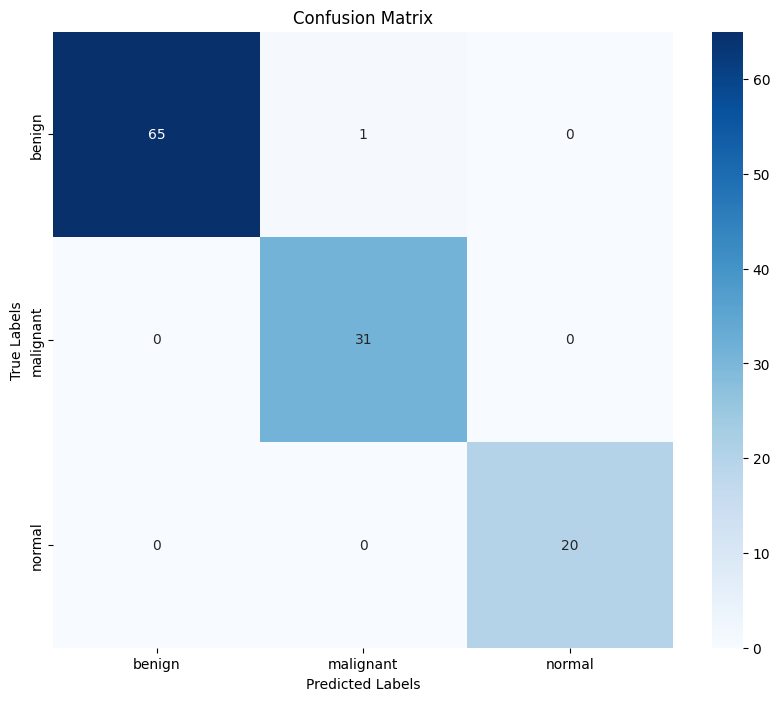

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step


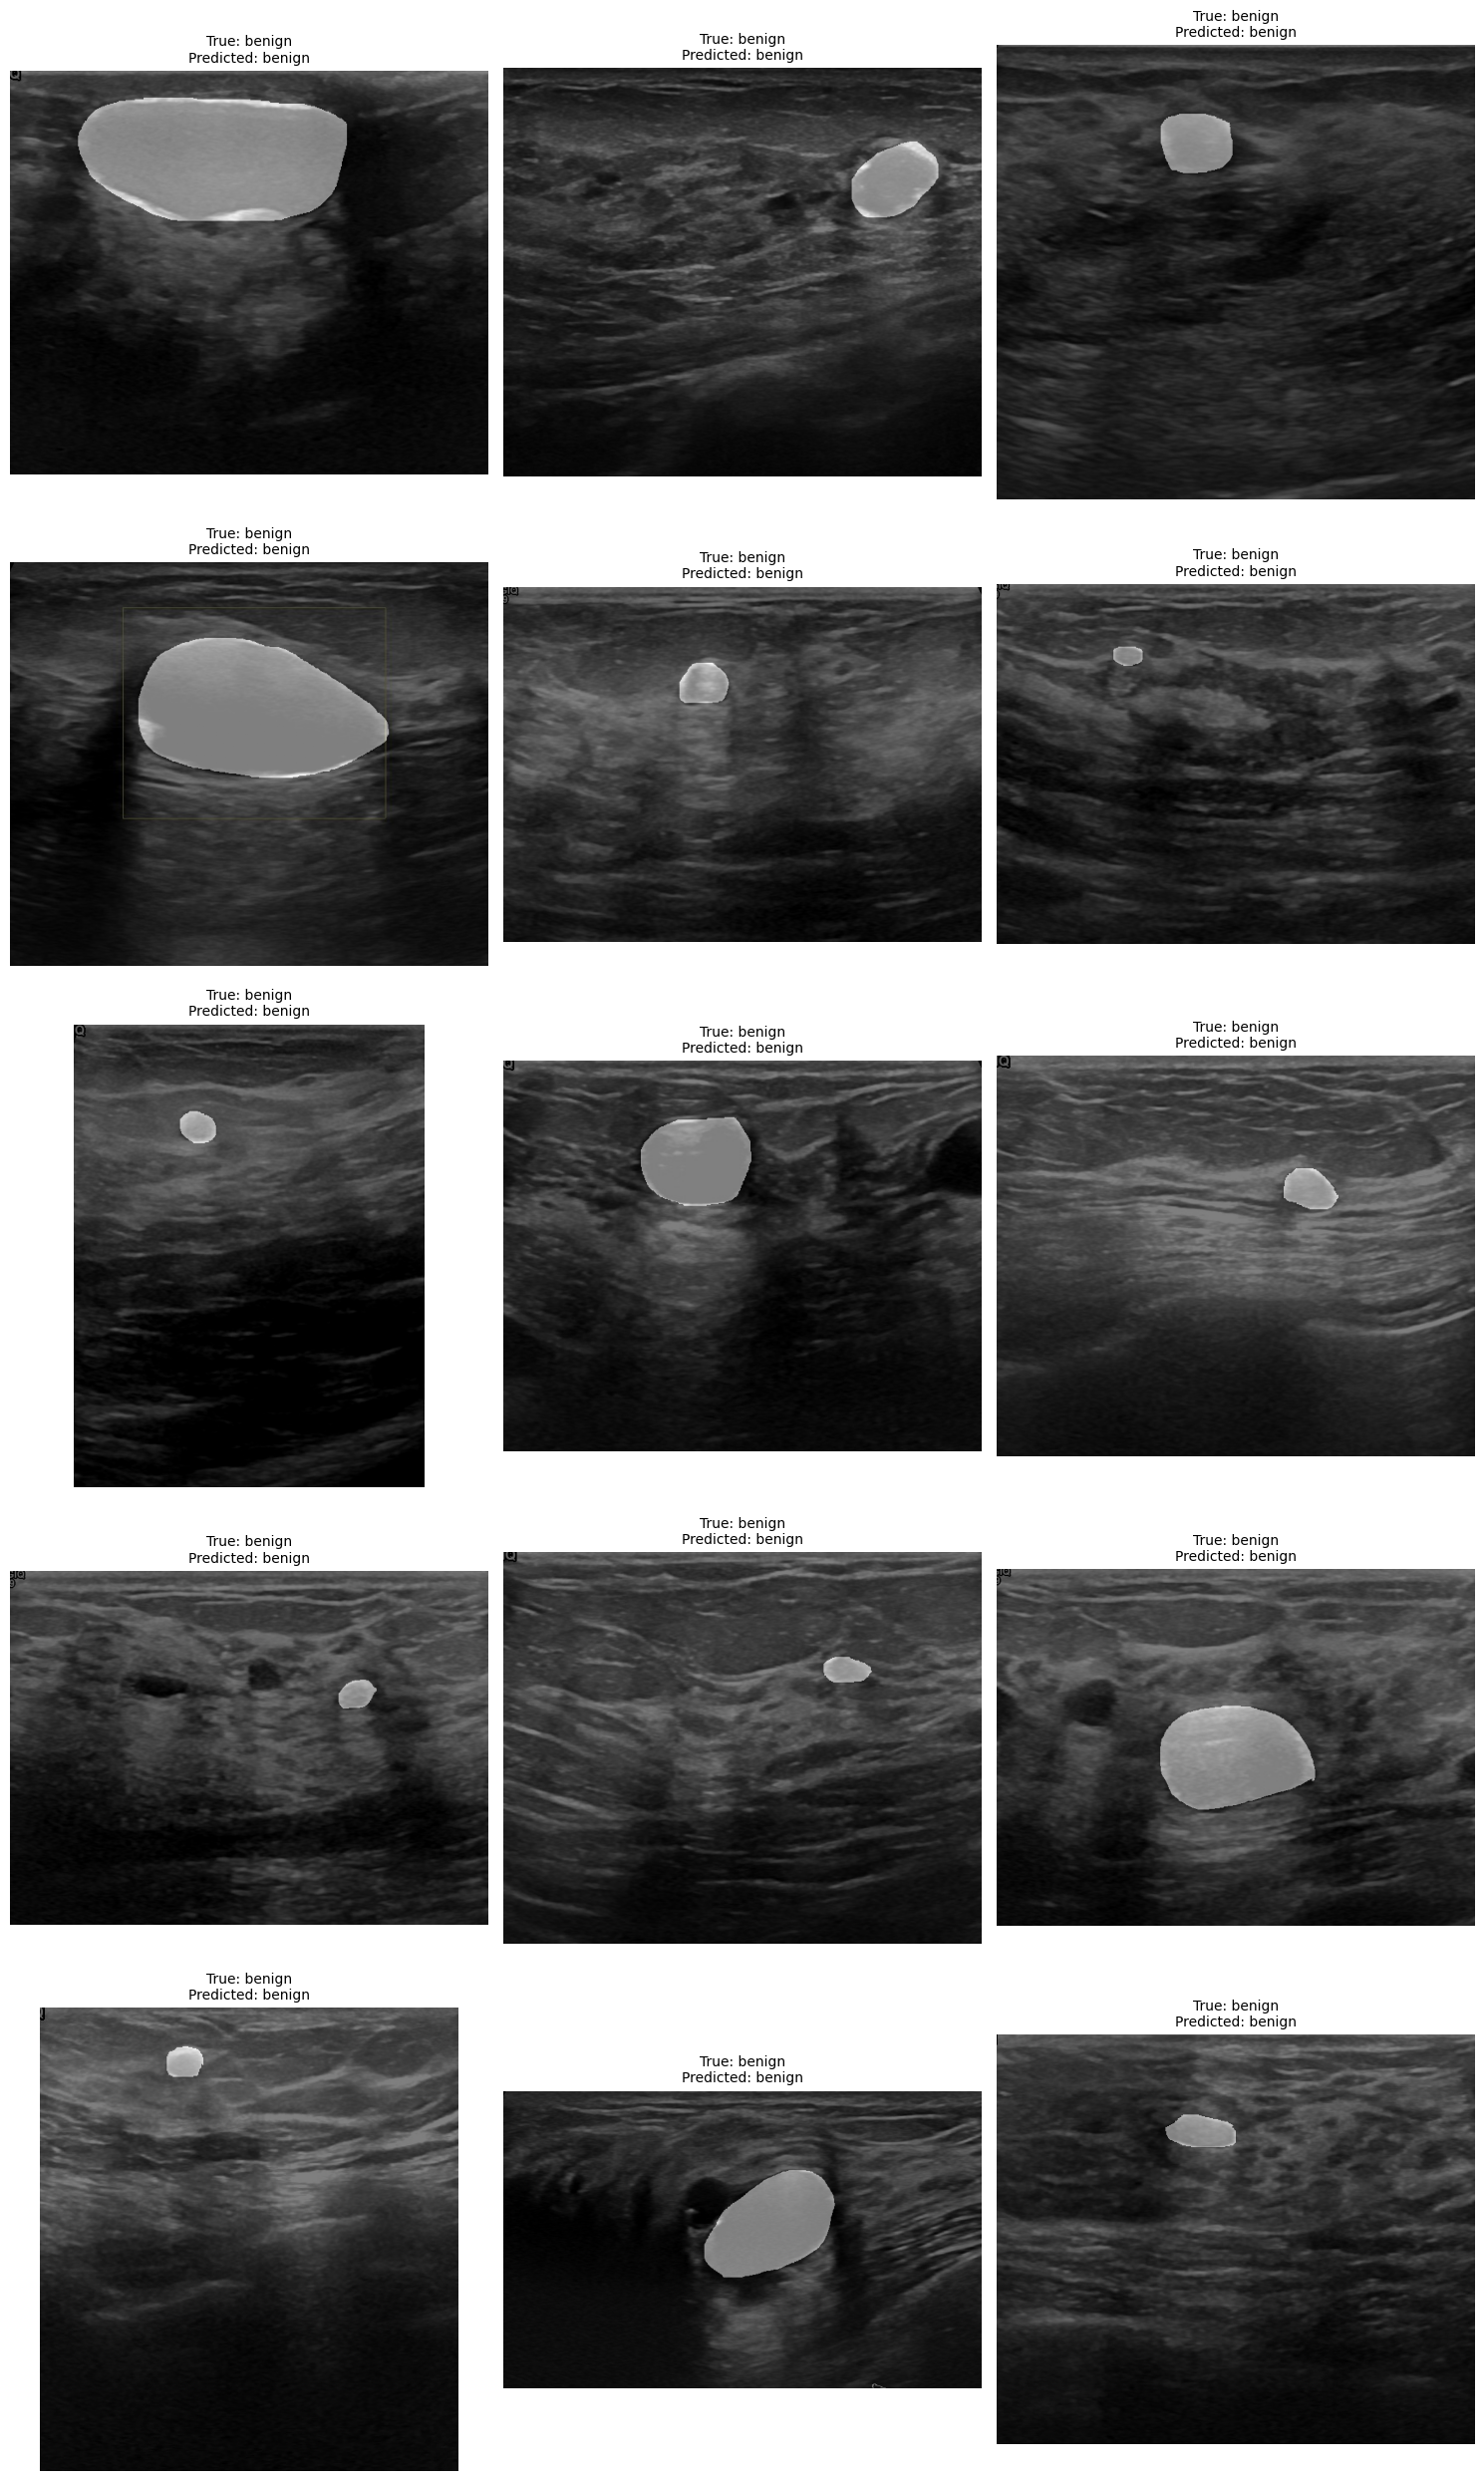

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Get true labels and predictions
true_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Get test images
test_images = []
for i in range(len(test_generator.filenames)):
    image_path = test_dir + '/' + test_generator.filenames[i]
    test_images.append(image_path)

# Plotting test images with labels and predictions
plt.figure(figsize=(15, 25))
for i in range(15):
    plt.subplot(5, 3, i + 1)
    img = plt.imread(test_images[i])
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {class_labels[true_labels[i]]}\nPredicted: {class_labels[predicted_labels[i]]}", fontsize=10)

plt.tight_layout()
plt.show()
